Формула для расчета размера выборки

In [2]:
from scipy import stats
import numpy as np

Эта формула дает значения как калькуляторы в итернте

In [14]:
def get_size_two_ind(p0, p1, alpha, beta):
    za = stats.norm.ppf(1- alpha / 2)
    zb = stats.norm.ppf(1 - beta)
    var0 = p0 * (1 - p0)
    var1 = p1 * (1 - p1)
    n = (za * np.sqrt(2 * var0) + zb * np.sqrt(var0 + var1)) / (p1 - p0)
    return int(np.ceil(n * n))

In [15]:
p0, p1 = 0.3, 0.307
alpha = 0.05
beta = 0.20
get_size_two_ind(p0, p1, alpha, beta)

67409

калькуляторы мощности в интернете используют разный подход  
к расчету стандартного отклонения  
можно вязть для расчета нулевую гипотезу, можно альтернативую,  
а можно среднее  (var0 + vara) * 0.5)
поэтому различаются результаты
Если поставить None вместо мощности, то получим мощность

In [3]:

from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm

p0, p1 = 0.1, 0.15
alpha = 0.05
beta = 0.05
analysis = TTestIndPower()
effect_size = sm.stats.proportion_effectsize(
    p0, 
    p1
)
# mde = (pa - p0) / np.sqrt((var0 + vara) * 0.5)
sample_size = analysis.solve_power(
    effect_size=effect_size
    , nobs1=None
    , alpha=alpha
    , power = (1 - beta)
    , ratio = 1
    # , alternative='larger'
)
sample_size

1127.364937072358

Построим графики для мощностей

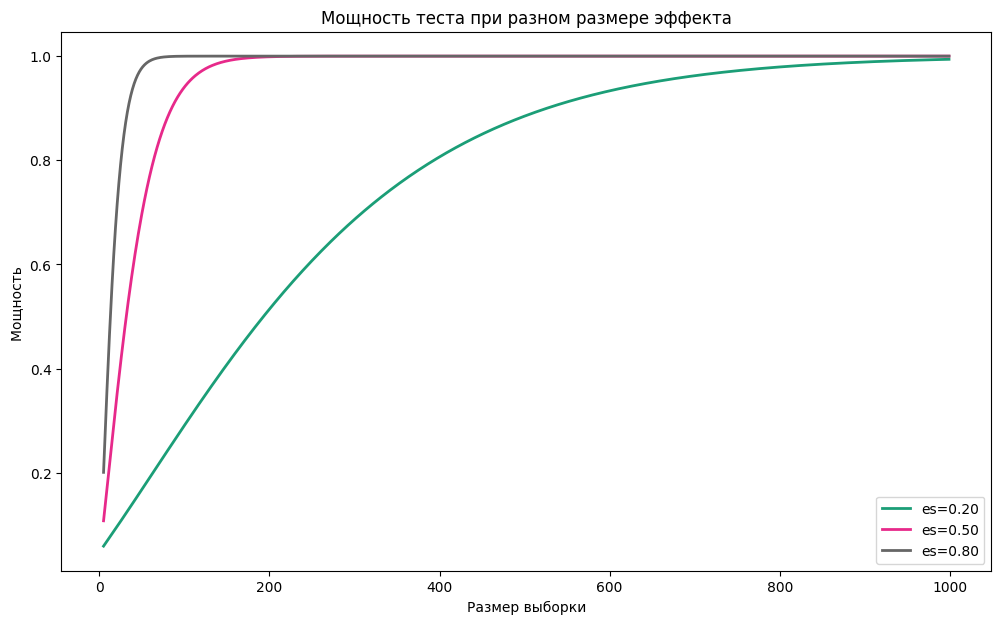

In [5]:
from statsmodels.stats.power import TTestIndPower
import matplotlib.pyplot as plt
import numpy as np
analysis = TTestIndPower()
effect_size = np.array([0.2, 0.5, 0.8])
sample_size = np.arange(5, 1000)
_, ax = plt.subplots(figsize=(12, 7))

analysis.plot_power(
    dep_var='nobs'
    , nobs=sample_size
    , effect_size=effect_size
    , ax = ax
)
ax.set_title('Мощность теста при разном размере эффекта')
ax.set_xlabel('Размер выборки')
ax.set_ylabel('Мощность ')
plt.legend()

Первая формула, для случая, когда мы имеющуюся конверсию или другую метрику рассматриваем как ген совокупность   
и выборку просто сравниваем обычным т или з тестом

In [ ]:
stats.norm.ppf(0.2)

-0.8416212335729142

In [ ]:
def get_size_one_with_gen(p0, pa, alpha, beta):
    za = stats.norm.ppf(1- alpha)
    zb = stats.norm.ppf(1- beta)
    var = p0 * (1 - p0)
    n = (za + zb) * np.sqrt(var) / (pa - p0)
    return int(np.ceil(n * n))

In [ ]:
alpha = 0.05
beta = 0.20
p0 = 0.20
pa = 0.25
get_size_one_with_gen(p0, pa, alpha, beta)

396

Вторая формула, если мы уже воспринимаем наши выборки как две разные и хотим понять  
какова вероятность получить такую или ещё более выраженную разницу между ними  
то есть используем независимый т тест

In [ ]:
def get_size_two_ind(p0, pa, alpha, beta):
    za = stats.norm.ppf(1- alpha)
    zb = stats.norm.ppf1 - beta)
    var0 = p0 * (1 - p0)
    vara = pa * (1 - pa)
    n = (za * np.sqrt(2 * var0) + zb * np.sqrt(var0 + vara)) / (pa - p0)
    return int(np.ceil(n * n))

In [ ]:
alpha = 0.05
beta = 0.20
p0 = 0.20
pa = 0.25
get_size_two_ind(p0, pa, alpha, beta)

76

можно использовать модуль statsmodel  
но нужно учитывать, что на вход mde нужно подавать  
нормированный на ошибку среднего    
по сути это т значение в распределении разности двух средних  
с нашими парметрами двух распределений

In [ ]:
n0, na = 468, 468
p0, pa = 0.1, 0.15
var0 = p0 * (1 - p0)
vara = pa * (1 - pa)
mde = (pa - p0) / np.sqrt((n0 * var0 + na * vara) / (n0 + na))

In [ ]:
mde

0.15161960871578062

Тут возникает проблема, что нам нужно указать размеры выборок, хотя мы их не знаем  
Но эта проблема только если у нас разные размеры выборки, если размеры одинаковый,  
то n0 na равны, тогда мы выносим в числителе и в знаменателе будет 2 * размер выборки и размер сокращаются

In [ ]:
p0, pa = 0.1, 0.15
var0 = p0 * (1 - p0)
vara = pa * (1 - pa)
mde = (pa - p0) / np.sqrt((var0 + vara) * 0.5)

In [ ]:
mde

0.15161960871578062

Если у нас не доли, а средние, то будет аналогично

In [ ]:
mu_control, sigma_control = 100, 8
mu_experiment, sigma_experiment = 110, 8
mde = (mu_experiment - mu_control) / np.sqrt((sigma_control**2 + sigma_experiment**2) * 0.5)
mde

1.25

In [ ]:
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm

Построим графики для мощностей

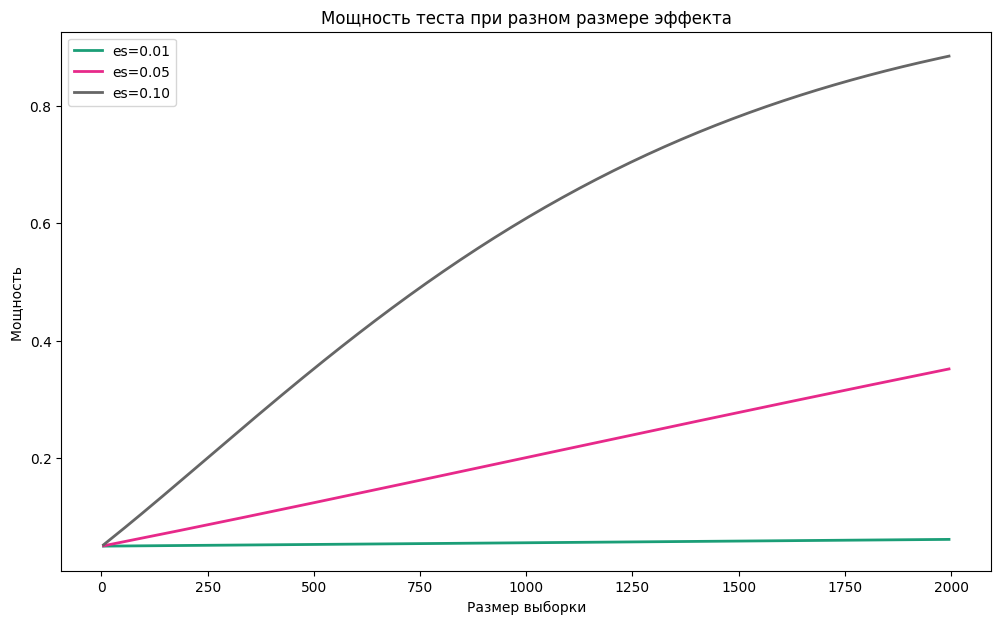

In [ ]:
analysis = TTestIndPower()
effect_size = np.array([0.01, 0.05, 0.1])
sample_size = np.arange(5, 2000, 10)
_, ax = plt.subplots(figsize=(12, 7))

analysis.plot_power(
    dep_var='nobs'
    , nobs=sample_size
    , effect_size=effect_size
    , ax = ax
)
ax.set_title('Мощность теста при разном размере эффекта')
ax.set_xlabel('Размер выборки')
ax.set_ylabel('Мощность ')
plt.legend()

## Практическое задание 2: разбор

Создаем массив:


In [ ]:
import numpy as np
users = np.array([1, 0, 0, 0, 1, 1, 1, 0, 1])

Считаем необходимые показатели:

In [ ]:
n = users.size
n

9

In [ ]:
p = users.sum() / n
p

0.5555555555555556

In [ ]:
se = np.sqrt(p * (1 - p) / n)
se

0.16563466499998442

Импортируем подмодуль и вызываем функцию для доверительного интервала:

In [ ]:
import scipy.stats as st

In [ ]:
st.norm.interval(0.95, loc=p, scale = se, )

(0.2309175775642291, 0.880193533546882)

Дополнительно: доверительный интервал для среднего

In [ ]:
import statsmodels.stats.api as stm

In [ ]:
ages = np.array([23, 24, 38, 34, 36, 37, 39])

In [ ]:
stm.DescrStatsW(ages).tconfint_mean(0.95)

(32.834861697945676, 33.165138302054324)